# Project: FuelConsumptionCo2

# Simple Linear Regression 

Importing Package

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Uploading Data

In [2]:
df= pd.read_csv('FuelConsumptionCo2.csv')

Reading the Data

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration

In [4]:
#Summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
#Cumulative
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


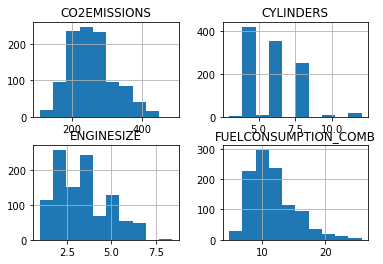

In [12]:
#ploting histogram of these features
viz=cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

ploting thos four features Vs Emission to see how linear their relations are. 


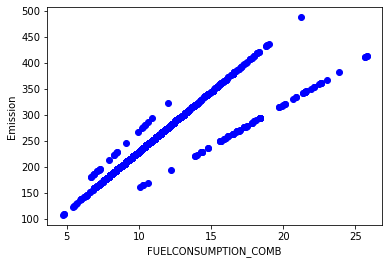

In [17]:
#FuelConsumption Vs Emission 
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

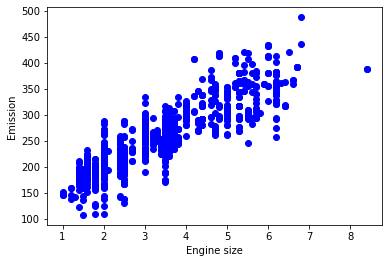

In [18]:
#EngineSize vs Emission

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

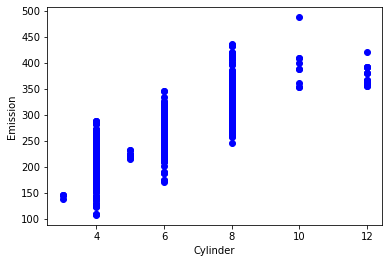

In [23]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

Creating train and test dataset

In [24]:
#lets split the dtaset into train and test set, 80% of the entire data for traning and 20% for testing. creat a mask to select random rows using np.random.rand():

msk= np.random.rand(len(df))<0.8
train = cdf[msk]
test= cdf[~msk]

modeling using sklearn package

In [30]:
from sklearn import linear_model
regr= linear_model.LinearRegression()

#Enginesize vs Co2 emission

train_x= np.asanyarray(train[['ENGINESIZE']])
train_y= np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
#the coefficients 
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

Coefficients: [[38.64007272]]
Intercept: [126.73581183]


Text(0, 0.5, 'Emissions')

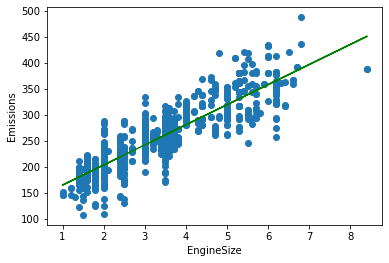

In [35]:
#plot the fit line over the data

#Enginesize vs Co2 emission

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x,regr.coef_[0][0]*train_x+ regr.intercept_[0],"green")
plt.xlabel("EngineSize")
plt.ylabel("Emissions")

Evaluation/Testing

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y= np.asanyarray(test[["CO2EMISSIONS"]])
test_y_hat= regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat -test_y)))
print("Residual sum of aquares(MSE): %.2f" %np.mean((test_y_hat - test_y)** 2))
print("R2-score: %2f" % r2_score(test_y_hat, test_y))


Mean absolute error: 24.00
Residual sum of aquares(MSE): 1090.80
R2-score: 0.630395


In [38]:
# FUELCONSUMPTION_COMB vs CO2Emission Train 


# Multiple Regression Model 

Modeling/Train data set

In [44]:
from sklearn import linear_model
regr= linear_model.LinearRegression()
#EngineSize, Cylinders,FuelConsumption_comb Vs Co2Emission)
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#the coefficients 
print("Coefficient:", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficient: [[11.38331504  7.06786668  9.42512471]]
Intercept:  [68.03728854]


Prediction/Test

In [46]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" %np.mean((y_hat -y)**2))

#Variance score: 1 is the perfect prediction

print("Variance score: %2f" % regr.score(x,y))


Residual sum of squares: 593.42
Variance score: 0.866320


# Polynomial Regression 

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.89770778 -1.62907369]]
Intercept:  [107.22681375]


Text(0, 0.5, 'Emission')

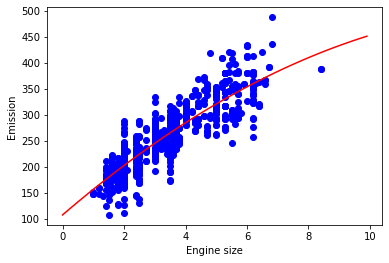

In [50]:
#plot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluation/Test

In [51]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 24.34
Residual sum of squares (MSE): 1092.01
R2-score: 0.75
